# radial_density_distribution

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.metrics.radial_density_distribution))

---
 ## Documentation for ``radial_density_distribution``
 ---
**<span style="color:purple">radial&#95;density&#95;distribution</span>_(im, bins=10, log=False, voxel_size=1)_**


Computes radial density function by analyzing the histogram of voxel
values in the distance transform.  This function is defined by
Torquato [1] as:


    .. math::

        \int_0^\infty P(r)dr = 1.0

where *P(r)dr* is the probability of finding a voxel at a lying at a radial
distance between *r* and *dr* from the solid interface.  This is equivalent
to a probability density function (*pdf*)

The cumulative distribution is defined as:

    .. math::

        F(r) = \int_r^\infty P(r)dr

which gives the fraction of pore-space with a radius larger than *r*. This
is equivalent to the cumulative distribution function (*cdf*).

#### Parameters
* im : <b><i>ND-array</i></b>  Either a binary image of the pore space with ``True`` indicating the
	pore phase (or phase of interest), or a pre-calculated distance
	transform which can save time.
* bins : <b><i>int or array_like</i></b>  This number of bins (if int) or the location of the bins (if array).
	This argument is passed directly to Scipy's ``histogram`` function so
	see that docstring for more information.  The default is 10 bins, which
	reduces produces a relatively smooth distribution.
* log : <b><i>boolean</i></b>  If ``True`` the size data is converted to log (base-10)
	values before processing.  This can help to plot wide size
	distributions or to better visualize the in the small size region.
	Note that you should not anti-log the radii values in the retunred
	``tuple``, since the binning is performed on the logged radii values.
* voxel_size : <b><i>scalar</i></b>  The size of a voxel side in preferred units.  The default is 1, so the
	user can apply the scaling to the returned results after the fact.

#### Returns
* result : <b><i>named_tuple</i></b>  A named-tuple containing several 1D arrays:
	
	*R* or *LogR* - radius, equivalent to ``bin_centers``
	
	*pdf* - probability density function
	
	*cdf* - cumulative density function
	
	*bin_centers* - the center point of each bin
	
	*bin_edges* - locations of bin divisions, including 1 more value than
	the number of bins
	
	*bin_widths* - useful for passing to the ``width`` argument of
	``matplotlib.pyplot.bar``

#### Notes
This function should not be taken as a pore size distribution in the
explict sense, but rather an indicator of the sizes in the image.  The
distance transform contains a very skewed number of voxels with small
values near the solid walls.  Nonetheless, it does provide a useful
indicator and it's mathematical formalism is handy.

Torquato refers to this as the *pore-size density function*, and mentions
that it is also known as the *pore-size distribution function*.  These
terms are avoided here since they have specific connotations in porous
media analysis.

#### References
[1] Torquato, S. Random Heterogeneous Materials: Mircostructure and
Macroscopic Properties. Springer, New York (2002) - See page 48 & 292
---

## Import packages

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

ps.visualization.set_mpl_style()

## Create image and variables:

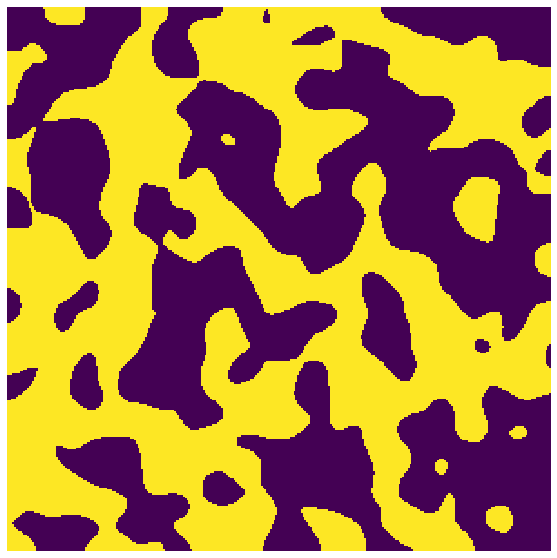

In [3]:
skel = ps.generators.blobs(shape=[300, 300])
branch_points = None
iterations = 10
im = ps.filters.prune_branches(skel, branch_points, iterations)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

#default values
log = False
bins = 10
voxel_size = 1

## Apply metric function:

Output is a tuple with elements R, pdf, cdf, bin_centers, bin_edges, and bin widths

### default

In [4]:
x = ps.metrics.radial_density_distribution(im=im, bins=bins, log = log, voxel_size=voxel_size)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Cumulative Density')

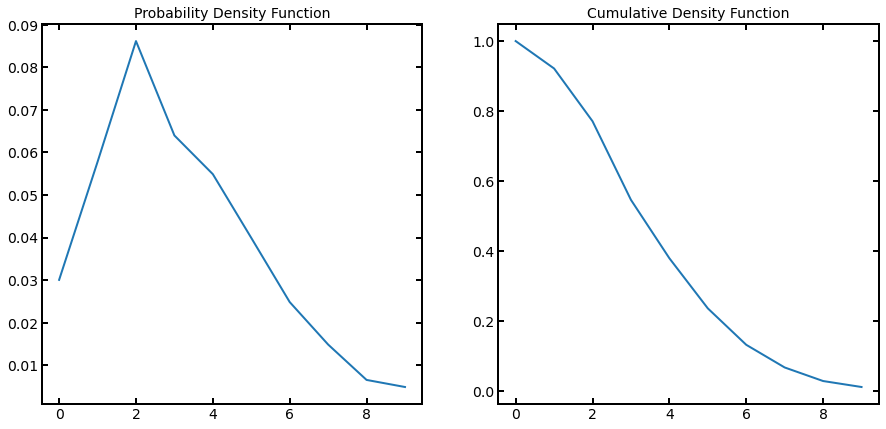

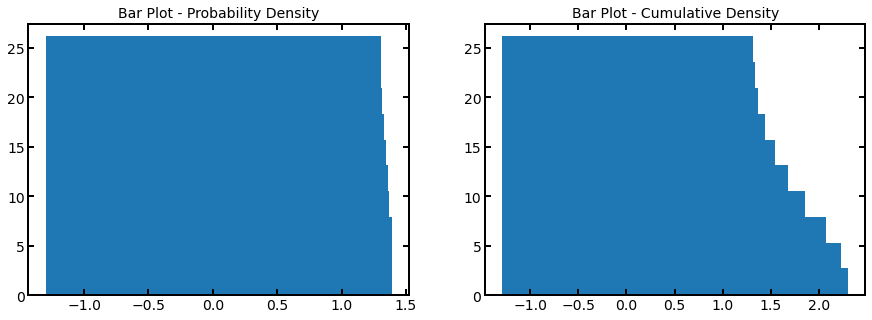

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 2, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')


### bins

In [6]:
x = ps.metrics.radial_density_distribution(im=im, bins=5, log=log, voxel_size= voxel_size)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Cumulative Density')

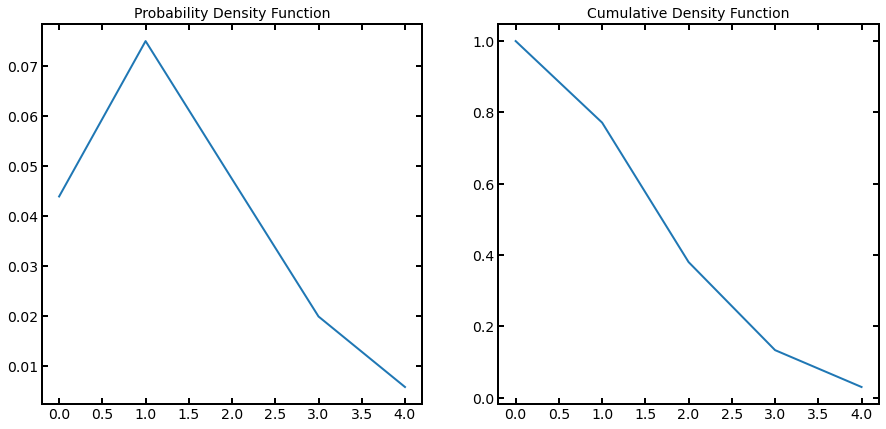

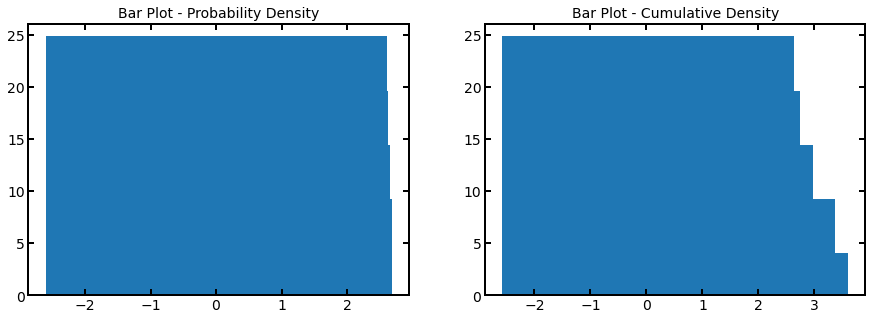

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 2, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')


### log

In [8]:
x = ps.metrics.radial_density_distribution(im=im, bins=bins, log=True, voxel_size= voxel_size)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Cumulative Density')

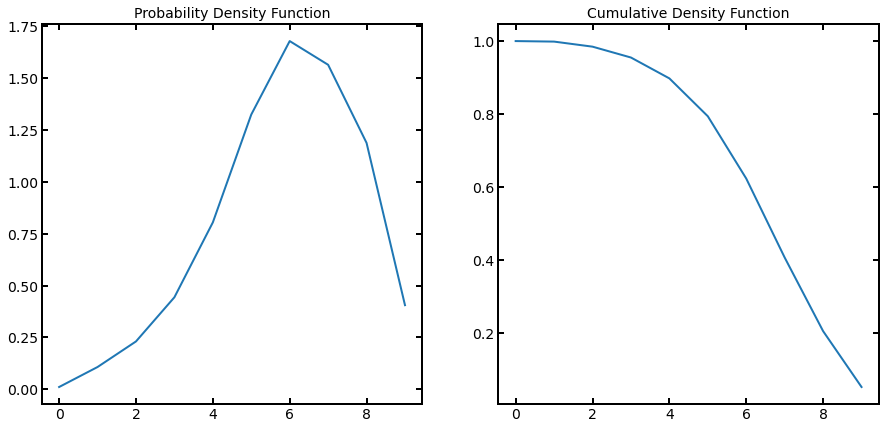

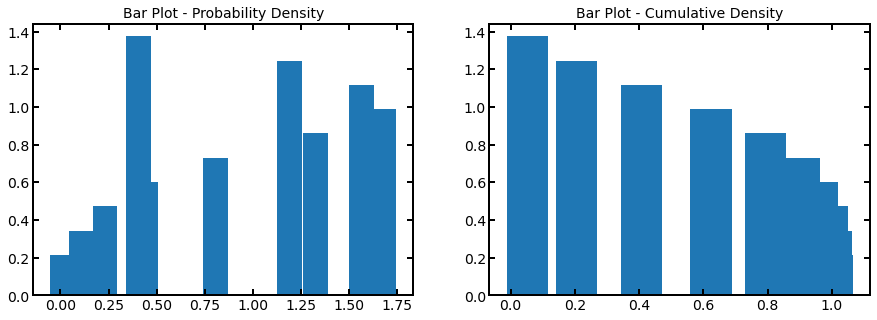

In [9]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 2, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')


### voxel_size

In [10]:
x = ps.metrics.radial_density_distribution(im=im, bins=bins, log=log, voxel_size= 10)

Plot results:

Text(0.5, 1.0, 'Bar Plot - Cumulative Density')

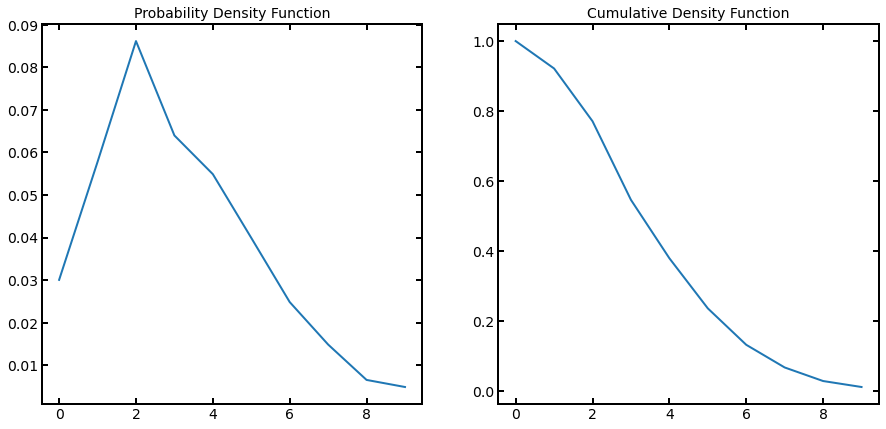

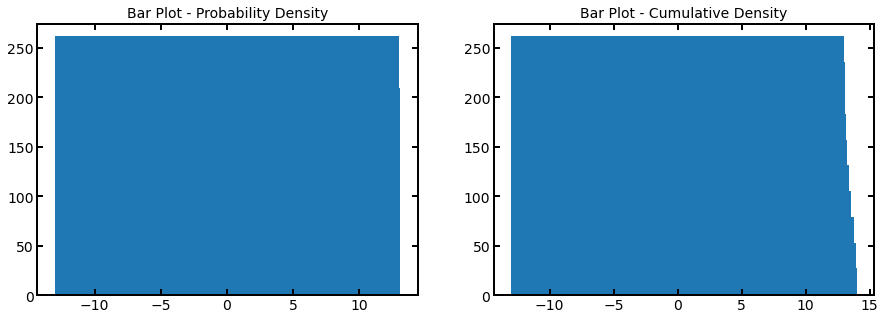

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[15, 7]);
ax[0].plot(x.pdf)
ax[1].plot(x.cdf)
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")

fig, ax = plt.subplots(1, 2, figsize=[15, 5]);
ax[0].bar(x.pdf, x.bin_centers, x.bin_widths)
ax[1].bar(x.cdf, x.bin_centers, x.bin_widths)
ax[0].set_title('Bar Plot - Probability Density')
ax[1].set_title('Bar Plot - Cumulative Density')
